In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import sklearn as sklearn

In [2]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,learning_curve,train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("diabetes_prediction_dataset.csv")

In [4]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
data.shape

(100000, 9)

In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

# DATA MANIPULATION

In [10]:
le = LabelEncoder()



In [11]:
data.gender = le.fit_transform(data.gender)


In [13]:
data.smoking_history = le.fit_transform(data.smoking_history)

In [16]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


Text(0.5, 1.0, 'Correlation heatmap')

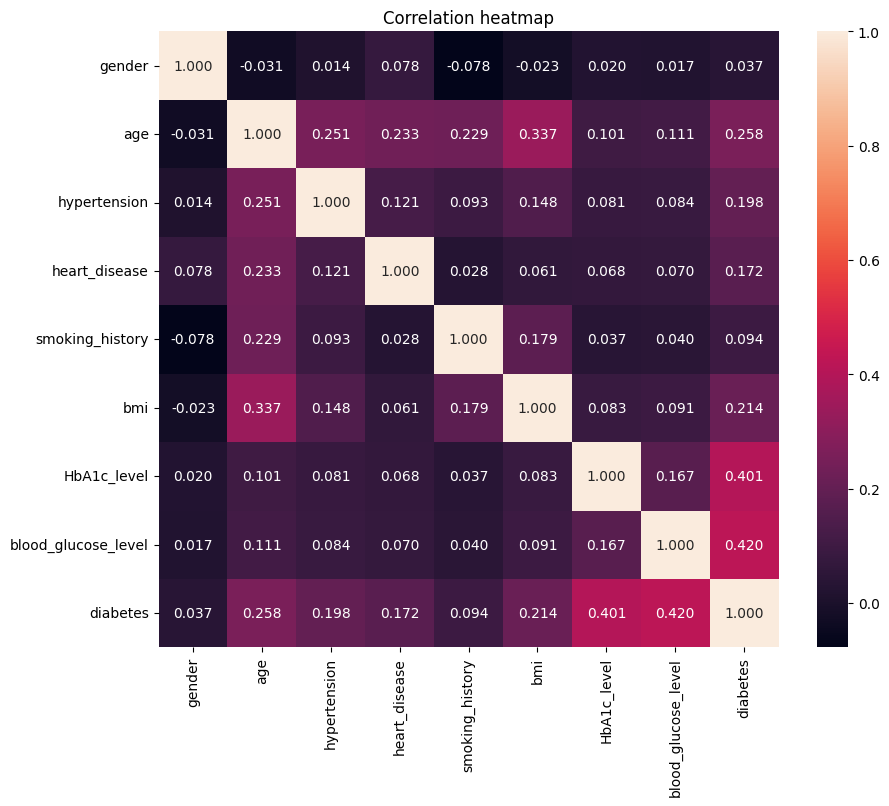

In [19]:
plt.figure(figsize =(10,8))
sns.heatmap(data.corr(),annot =True,fmt=".3f")
plt.title("Correlation heatmap")

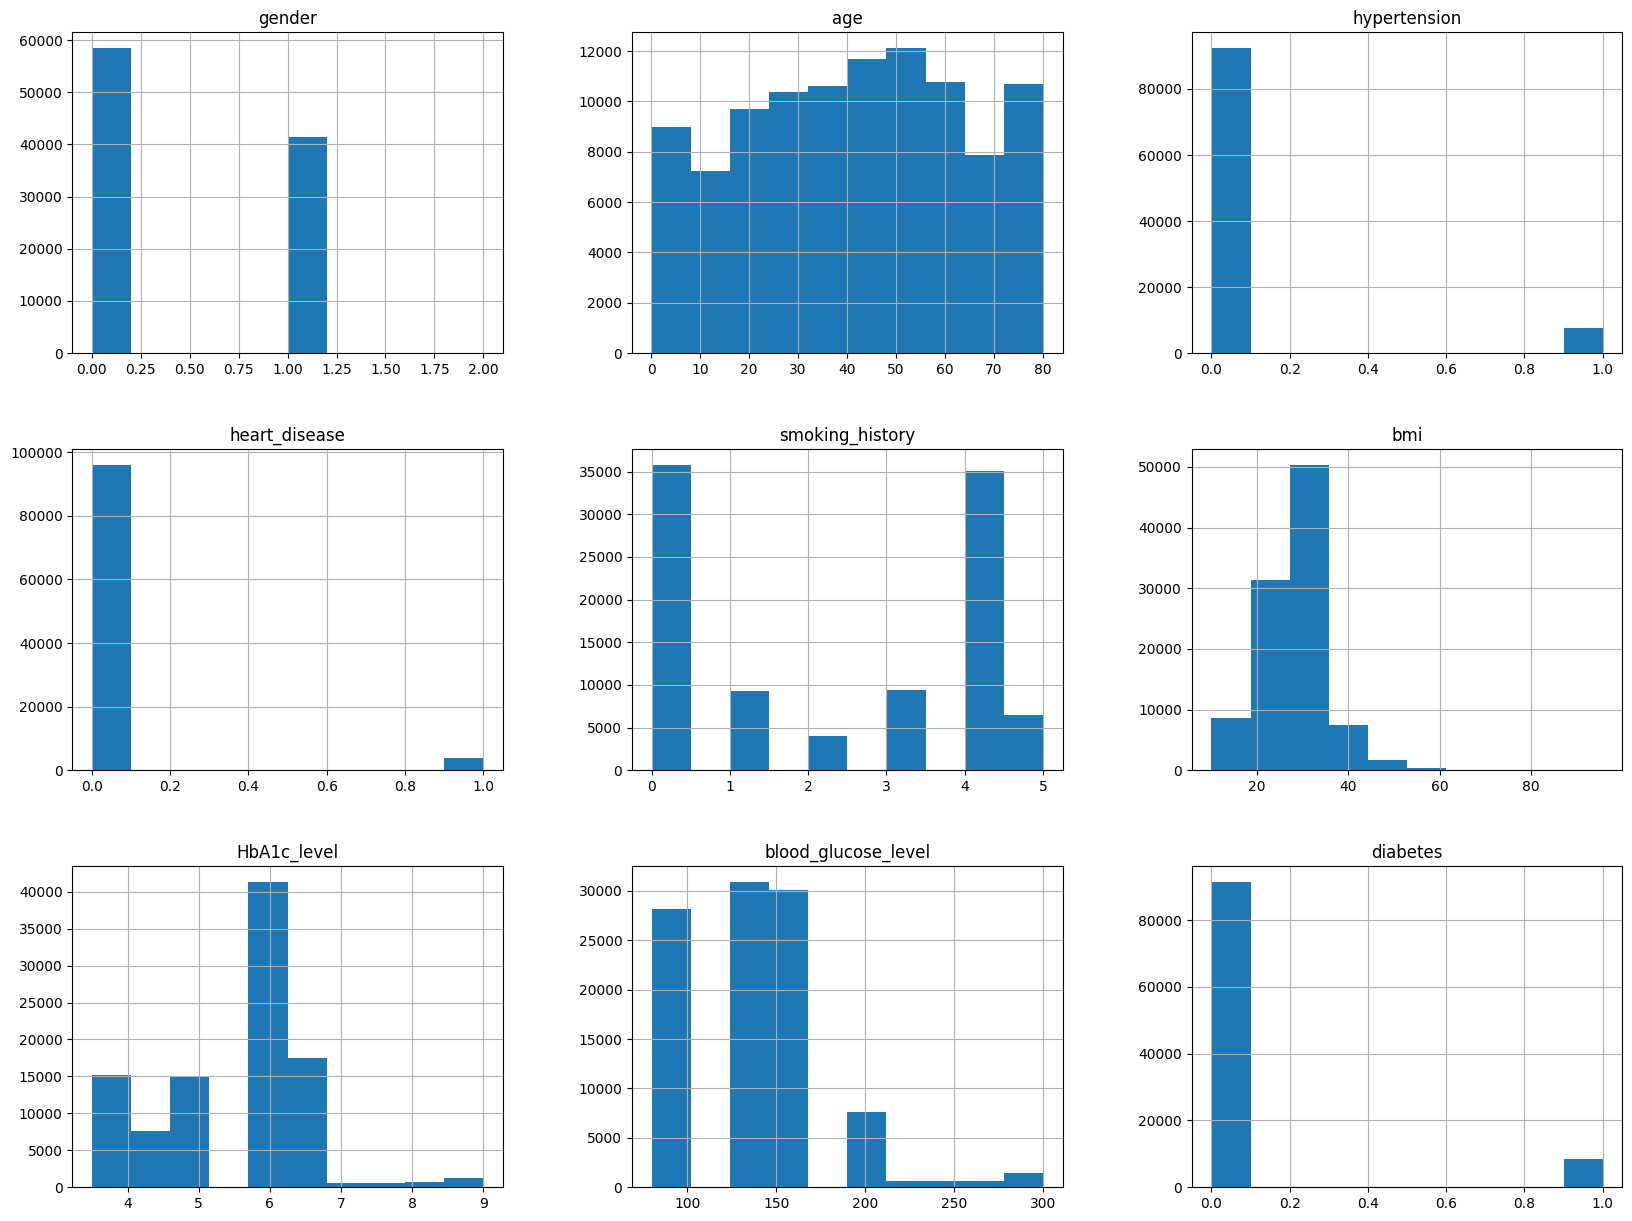

In [26]:
p=data.hist(figsize=(20,15))

In [29]:
import missingno as msno


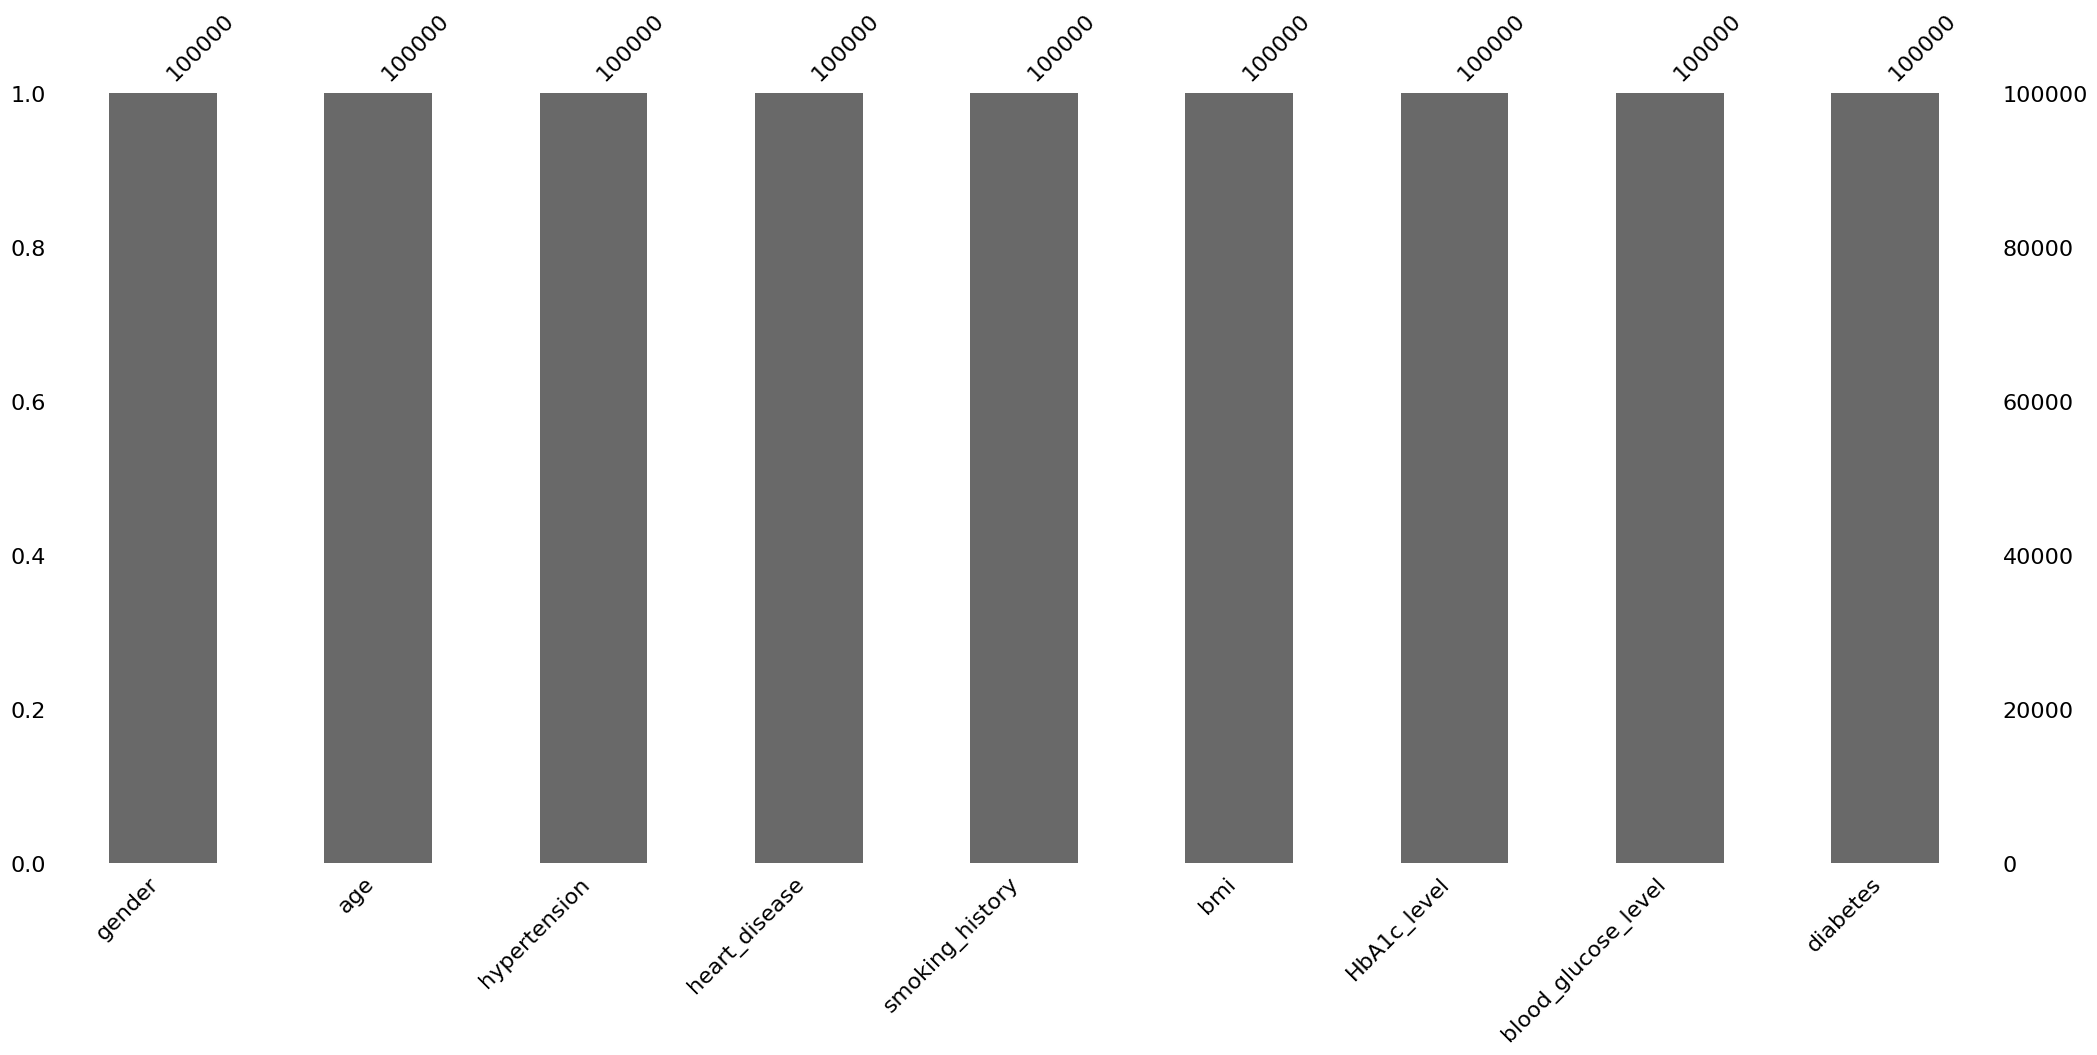

In [30]:
p=msno.bar(data)

# DATA VISUALIZATION

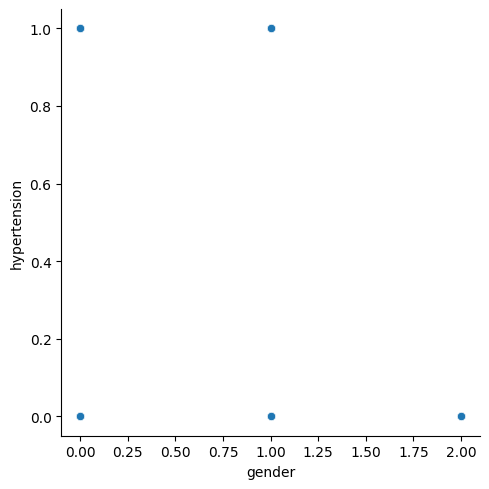

In [31]:
sns.relplot(x="gender",y="hypertension",data=data)

In [32]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


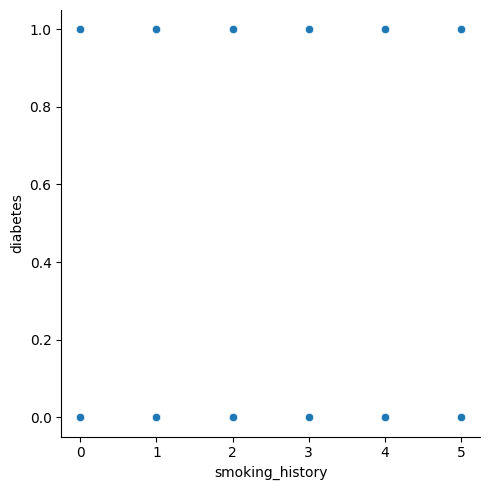

In [34]:
sns.relplot(x="smoking_history",y="diabetes",data=data)

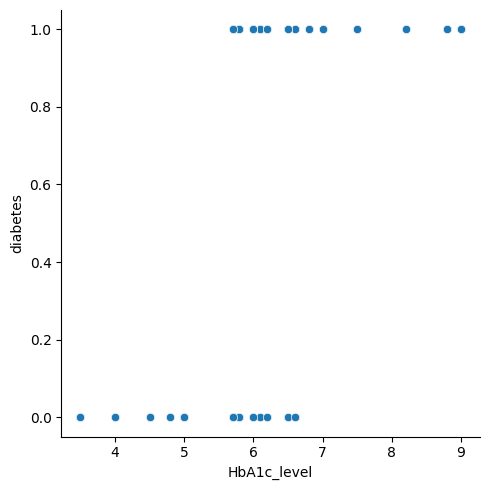

In [37]:
sns.relplot(x="HbA1c_level",y="diabetes",data=data)

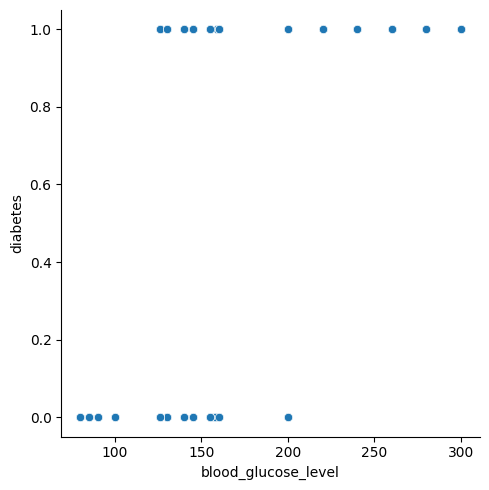

In [38]:
sns.relplot(x="blood_glucose_level",y="diabetes",data=data)

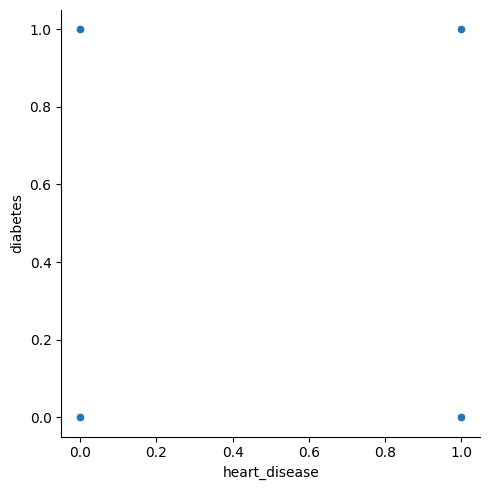

In [39]:
sns.relplot(x="heart_disease",y="diabetes",data=data)

In [40]:
### after standard scaling 

In [42]:
from sklearn.preprocessing import StandardScaler


In [43]:
sc_X = StandardScaler()

In [47]:
X = pd.DataFrame(sc_X.fit_transform(data.drop(["diabetes"],axis = 1),), columns = ["gender","age","hypertension","heart_disease","smoking_history","bmi","HbA1c_level","blood_glucose_level"])
X.head()                 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.841047,1.692704,-0.284439,4.936379,0.963327,-0.321056,1.001706,0.047704
1,-0.841047,0.538006,-0.284439,-0.202578,-1.153468,-0.000116,1.001706,-1.426210
2,1.187234,-0.616691,-0.284439,-0.202578,0.963327,-0.000116,0.161108,0.489878
3,-0.841047,-0.261399,-0.284439,-0.202578,-0.624269,-0.583232,-0.492690,0.416183
4,1.187234,1.515058,3.515687,4.936379,-0.624269,-1.081970,-0.679490,0.416183


In [48]:
## train and split of data

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
X = data.drop('diabetes', axis=1)
y = data['diabetes'] 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)


In [52]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [53]:
rfc_train = rfc.predict(X_train)


In [55]:
from sklearn import metrics


In [56]:
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))


Accuracy_Score = 0.9993731343283582


In [57]:
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))


Accuracy_Score = 0.9696969696969697


In [66]:
from sklearn.metrics import classification_report


In [67]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30200
           1       0.96      0.67      0.79      2800

    accuracy                           0.97     33000
   macro avg       0.96      0.84      0.89     33000
weighted avg       0.97      0.97      0.97     33000



In [63]:
## decision tree

In [64]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))


Accuracy Score = 0.9514848484848485


In [69]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


[[29345   855]
 [  746  2054]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     30200
           1       0.71      0.73      0.72      2800

    accuracy                           0.95     33000
   macro avg       0.84      0.85      0.85     33000
weighted avg       0.95      0.95      0.95     33000



In [70]:
## we are using rfc because of high accuracy score

In [71]:
rfc.feature_importances_

array([0.00701028, 0.09720819, 0.01508517, 0.00960395, 0.02815414,
       0.1198945 , 0.39750903, 0.32553472])

<Axes: >

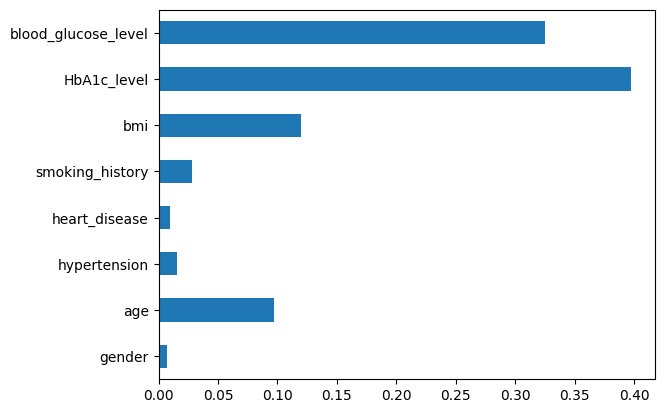

In [75]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))
### here the mosst imp feature is the hba1c level

In [76]:
## saving model

In [77]:
import pickle

In [78]:
saved_model = pickle.dumps(rfc)


In [79]:
rfc_from_pickle = pickle.loads(saved_model)


In [80]:
rfc_from_pickle.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
data.head(968)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
963,0,34.0,0,0,1,21.60,5.7,130,0
964,1,49.0,0,0,4,27.60,6.1,85,0
965,0,80.0,1,0,4,23.28,3.5,155,0
966,1,39.0,0,0,0,27.32,4.8,130,0


In [82]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0
99999,0,57.0,0,0,1,22.43,6.6,90,0


In [87]:
rfc.predict([[0,1,2,3,4,5,6,7]])

C:\Users\Atul kishore\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [88]:
rfc.predict([[788,967,911,543,23,789,654,431]])

C:\Users\Atul kishore\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)